Analiza składowych głównych

Text(0.5, 1.0, 'Dane po PCA')

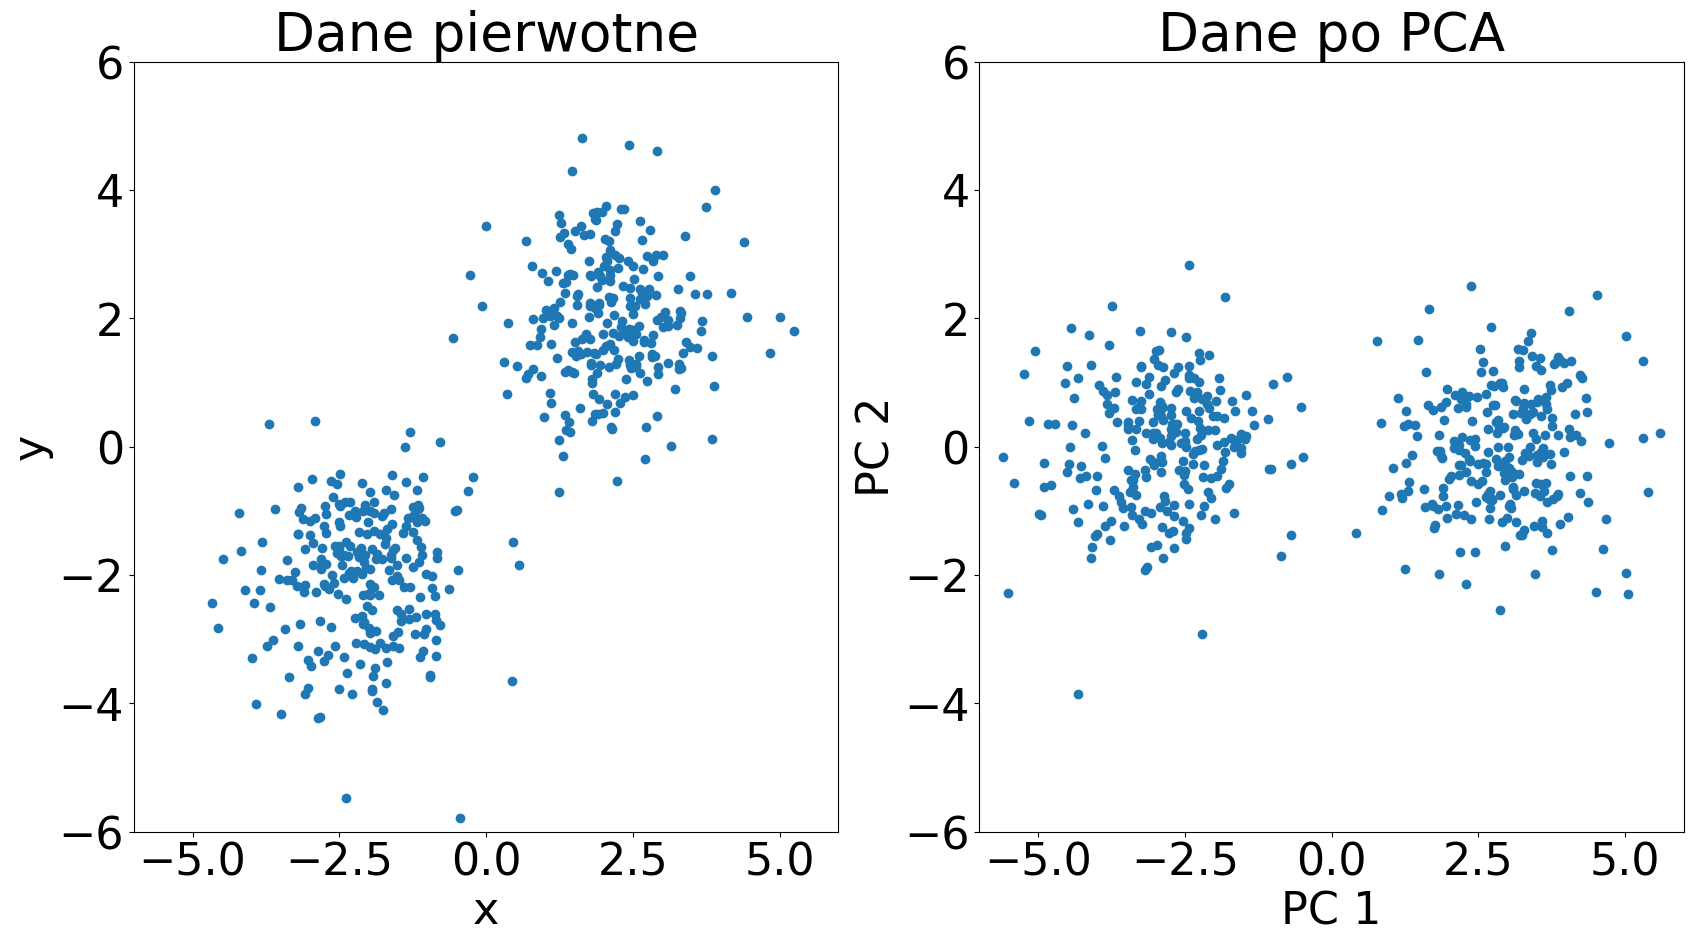

In [12]:
import numpy as np
from matplotlib import rcParams
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
example = np.random.randn(500,2)
example[:250,:] -= 2
example[250:,:] += 2
example_PCAed = PCA(2).fit_transform(example)
fig, ax = plt.subplots(1,2, figsize=(20, 10))
rcParams['font.size'] = 32
ax[0].scatter(example[:,0], example[:,1])
ax[1].scatter(example_PCAed[:,0], example_PCAed[:,1])
lim = 6
ax[0].set_xlim([-lim, lim])
ax[0].set_ylim([-lim, lim])
ax[1].set_xlim([-lim, lim])
ax[1].set_ylim([-lim, lim])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 2')
ax[0].set_title('Dane pierwotne')
ax[1].set_title('Dane po PCA')

Wygenerowanie wykresu procentu wyjaśnionej wariancji oraz znalezienie liczby składowych głównych, zapewniającej 95 wyjaśnionej wariancji

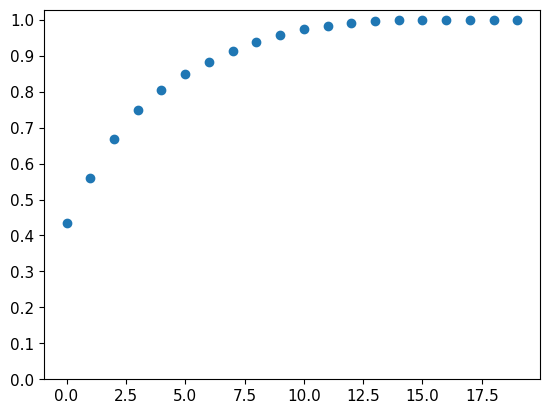

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

rcParams['font.size'] = 11
def qualitative_to_0_1(data,column,value_to_be_1):
    mask=data[column].values==value_to_be_1
    data[column][mask]=1
    data[column][~mask]=0
    return data
data=pd.read_csv("voice_extracted_features.csv",sep=',')
data=qualitative_to_0_1(data,'label','female')
features=list(data.columns)
vals=data.values.astype(float)
X=vals[:,:-1]
y=vals[:,-1]
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
pca_transform = PCA()
pca_transform.fit(X_train)
variances = pca_transform.explained_variance_ratio_
cumulated_variances = variances.cumsum()
plt.scatter(np.arange(variances.shape[0]), cumulated_variances)
plt.yticks(np.arange(0, 1.1, 0.1))
PC_num = (cumulated_variances<0.95).sum()

Przykład zastosowania analizy składowych głównych oraz wizualizacji jej wyników

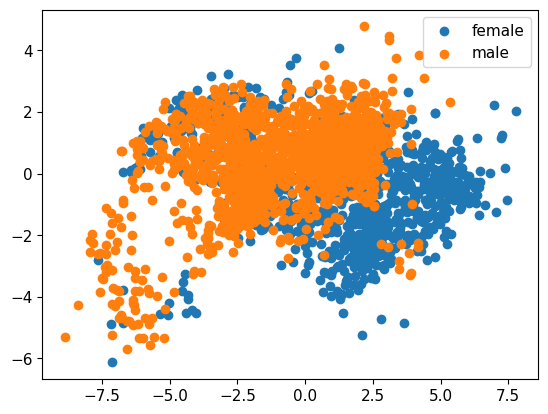

In [14]:
X_paced=PCA(2).fit_transform(X_train)
fig,ax=plt.subplots(1,1)
females=y_train==1
ax.scatter(X_paced[females,0],X_paced[females,1],
label='female')
ax.scatter(X_paced[~females,0],X_paced[~females,1],
label='male')
ax.legend()

Analiza składowych niezależnych

Text(0.5, 1.0, 'Obrazek po ICA')

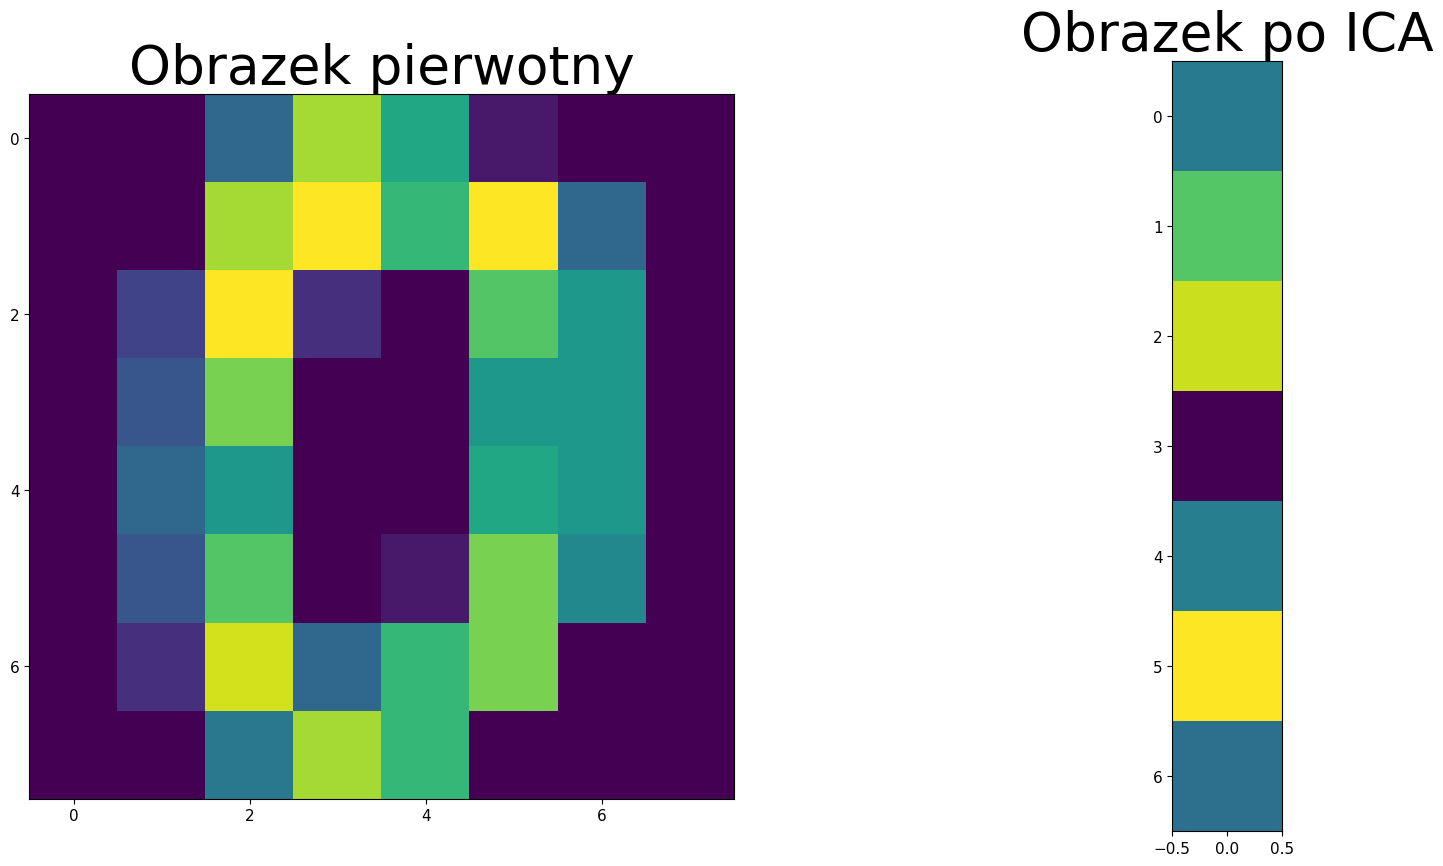

In [15]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
X, _ = load_digits(return_X_y=True)
transformer = FastICA(n_components=7, random_state=0)
X_transformed = transformer.fit_transform(X)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
rcParams['font.size'] = 32
ax[0].imshow(X[0].reshape(8, 8))
ax[1].imshow(X_transformed[0].reshape(7, 1))
ax[0].set_title('Obrazek pierwotny')
ax[1].set_title('Obrazek po ICA')


Zastosowanie klasy Pipeline

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, stratify=y)

pca_transform = PCA(9)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_pcaed = pca_transform.fit_transform(X_train)
X_test_pcaed = pca_transform.transform(X_test)
X_train_pcaed_scaled = scaler.fit_transform(X_train_pcaed)
X_test_pcaed_scaled = scaler.transform(X_test_pcaed)
model = kNN(5, weights='distance')
model.fit(X_train_pcaed_scaled, y_train)
y_predict = model.predict(X_test_pcaed_scaled)